In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Train.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.shape

(8068, 11)

In [4]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [5]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
# filling categorical columns

missing_cat_cols = ['Ever_Married' , 'Graduated' , 'Profession' , 'Var_1']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
df[missing_cat_cols].isna().sum()

Ever_Married    0
Graduated       0
Profession      0
Var_1           0
dtype: int64

In [8]:
# filling numerical columns

missing_num_cols = ['Work_Experience' , 'Family_Size']

for col in missing_num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
df[missing_num_cols].isna().sum()

Work_Experience    0
Family_Size        0
dtype: int64

In [10]:
# Remove Irrelevant Features
df = df.drop('ID' , axis = 1)

In [11]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


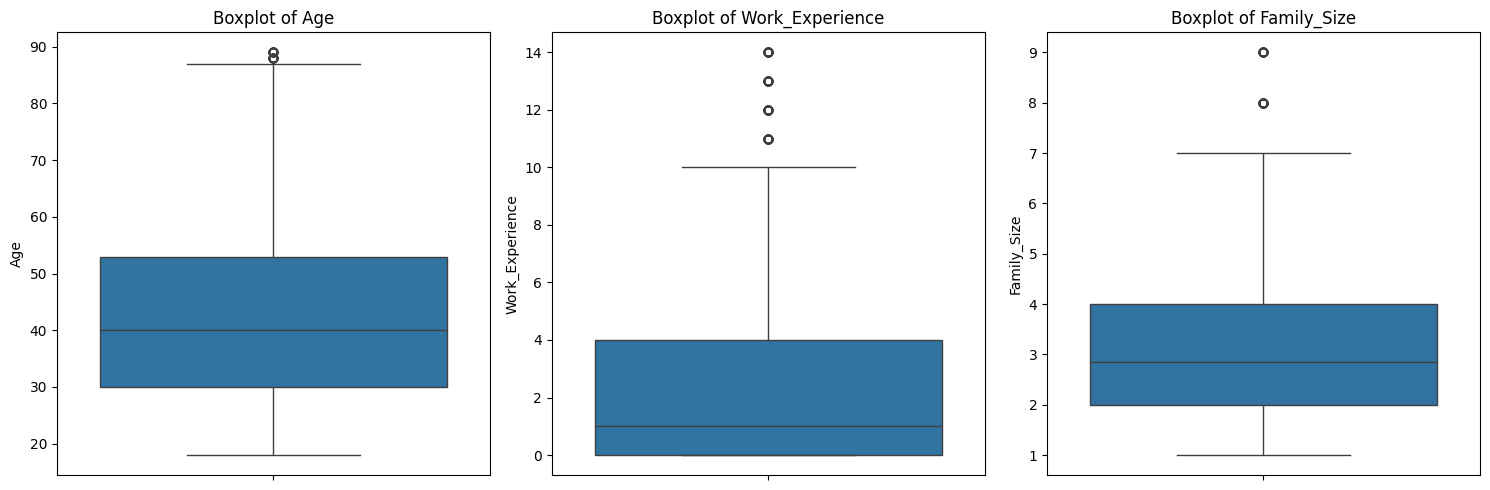

In [12]:
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [13]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers(df, numerical_cols)

In [14]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Assuming df is your preprocessed DataFrame
# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ever_Married'] = df['Ever_Married'].map({'Yes': 1, 'No': 0})
df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Spending_Score
spending_order = ['Low', 'Average', 'High']
df['Spending_Score'] = OrdinalEncoder(categories=[spending_order]).fit_transform(df[['Spending_Score']])

# One-hot encoding for Profession and Var_1
df = pd.get_dummies(df, columns=['Profession', 'Var_1'], drop_first=True)

In [16]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,38,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,67,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,40,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [18]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.056338,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.281690,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.690141,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.690141,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.309859,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
X = df.drop('Segmentation', axis=1)
X.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.056338,0,1.000000,0.0,4.0,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.281690,1,2.641663,1.0,3.0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.690141,1,1.000000,0.0,1.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.690141,1,0.000000,2.0,2.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.309859,1,2.641663,2.0,6.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False


# Plot Function

In [20]:
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

# Base Model (KMeans)

Cluster
1    3376
3    1672
2    1645
0    1375
Name: count, dtype: int64


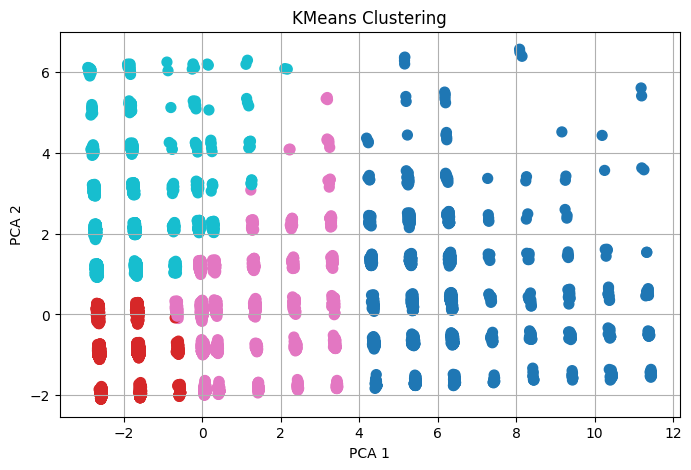

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
print(df_clusters['Cluster'].value_counts())

plot_clusters(X, kmeans_labels, "KMeans Clustering")

# Bisecting KMeans

### Sum of Squared Error Function

In [22]:
def calculate_sse(X, labels, centroids):
  sse = 0
  for i in range(len(centroids)):
      cluster_points = X[labels == i]
      if len(cluster_points) == 0:
          continue
      # Sum of squared distances from points to their centroid
      sse += np.sum((cluster_points - centroids[i]) ** 2)
  return sse

### Bisecting Function

In [23]:
def bisecting_kmeans(X, final_k=3, max_iter=100, num_trials=5, random_state=42):
  clusters = {0: X}
  cluster_assignments = {0: np.arange(len(X))} # Track indices of points in each cluster
  cluster_labels = np.zeros(len(X), dtype=int) # Final cluster labels
  
  current_k = 1
  
  while current_k < final_k:
    # Choose the cluster with highest SSE
    sse_per_cluster = {}
    for i in clusters:
      model = KMeans(n_clusters=1, random_state=random_state)
      model.fit(clusters[i])
      sse_per_cluster[i] = model.inertia_
    
    to_split = max(sse_per_cluster, key=sse_per_cluster.get)
    
    # Try multiple 2-means splits and choose the best one (lowest total SSE)
    best_sse = np.inf
    best_labels = None
    for _ in range(num_trials):
      model = KMeans(n_clusters=2, max_iter=max_iter, random_state=random_state)
      labels = model.fit_predict(clusters[to_split])
      sse = model.inertia_

      if sse < best_sse:
          best_sse = sse
          best_labels = labels

    # Split the cluster into two
    data_to_split = clusters[to_split]
    indices_to_split = cluster_assignments[to_split]

    new_cluster_id_1 = max(clusters) + 1
    new_cluster_id_2 = new_cluster_id_1 + 1

    mask1 = best_labels == 0
    mask2 = best_labels == 1

    clusters[new_cluster_id_1] = data_to_split[mask1]
    clusters[new_cluster_id_2] = data_to_split[mask2]

    cluster_assignments[new_cluster_id_1] = indices_to_split[mask1]
    cluster_assignments[new_cluster_id_2] = indices_to_split[mask2]

    # Remove the original cluster
    del clusters[to_split]
    del cluster_assignments[to_split]

    current_k += 1

  # Assign final labels
  for new_label, cluster_id in enumerate(cluster_assignments):
      cluster_labels[cluster_assignments[cluster_id]] = new_label

  return cluster_labels

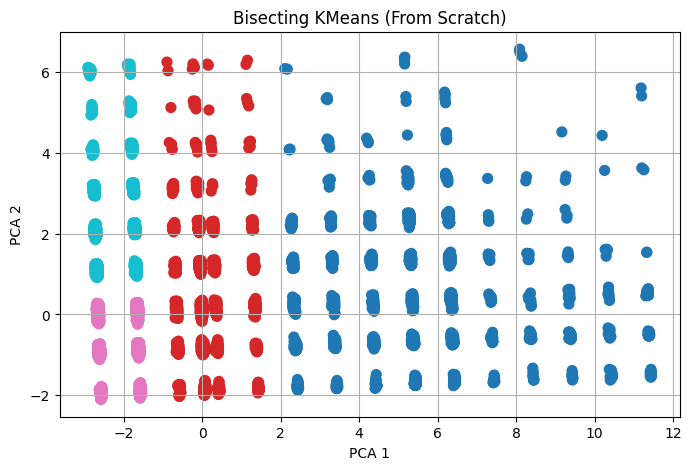

In [24]:
bisect_labels = bisecting_kmeans(X, final_k=4)
plot_clusters(X, bisect_labels, title="Bisecting KMeans (From Scratch)")

### Compare with KMeans

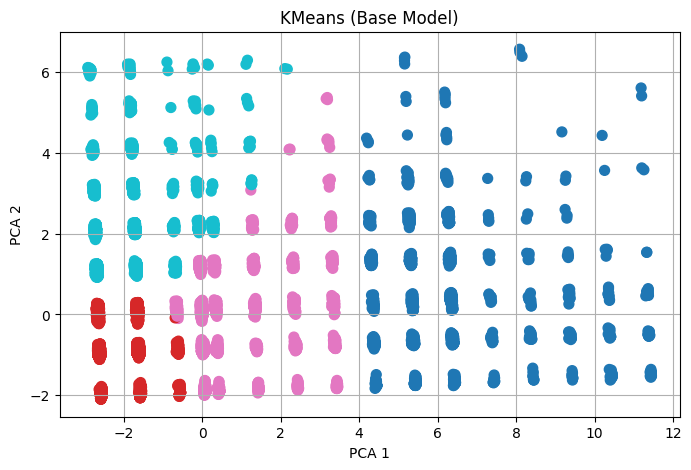

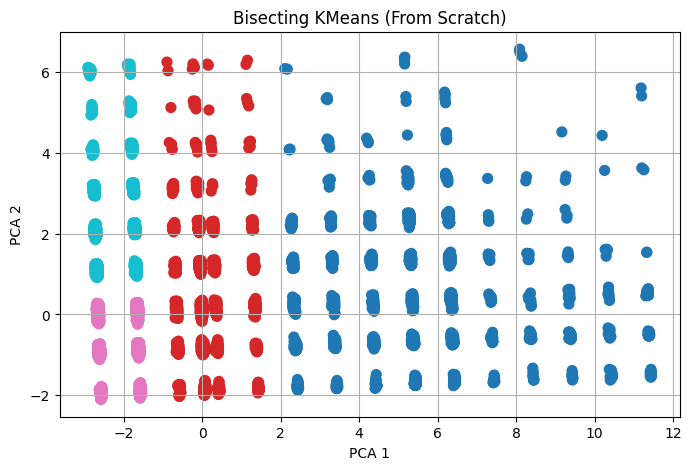

In [25]:
plot_clusters(X, kmeans_labels, title="KMeans (Base Model)")
plot_clusters(X, bisect_labels, title="Bisecting KMeans (From Scratch)")